In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from dataset import *
from Examples.Functions_examples import *
from tqdm import tqdm
from scipy.signal import welch
from scipy.stats import ttest_rel

## Load Data

#### Load raw data from pickle file

In [2]:
data = load_pickle('../Data/Dataset_4subjects_Exe_Obs')

#### Select participant and session

In [3]:
session = data['s6']['sess1']

## Separate into trials

In [4]:
d = get_trials(session, 2048)
d[0].shape

(106, 14336)

Compute PSD for each baselines and activities, then mean it

100%|██████████| 106/106 [00:15<00:00,  6.99it/s]


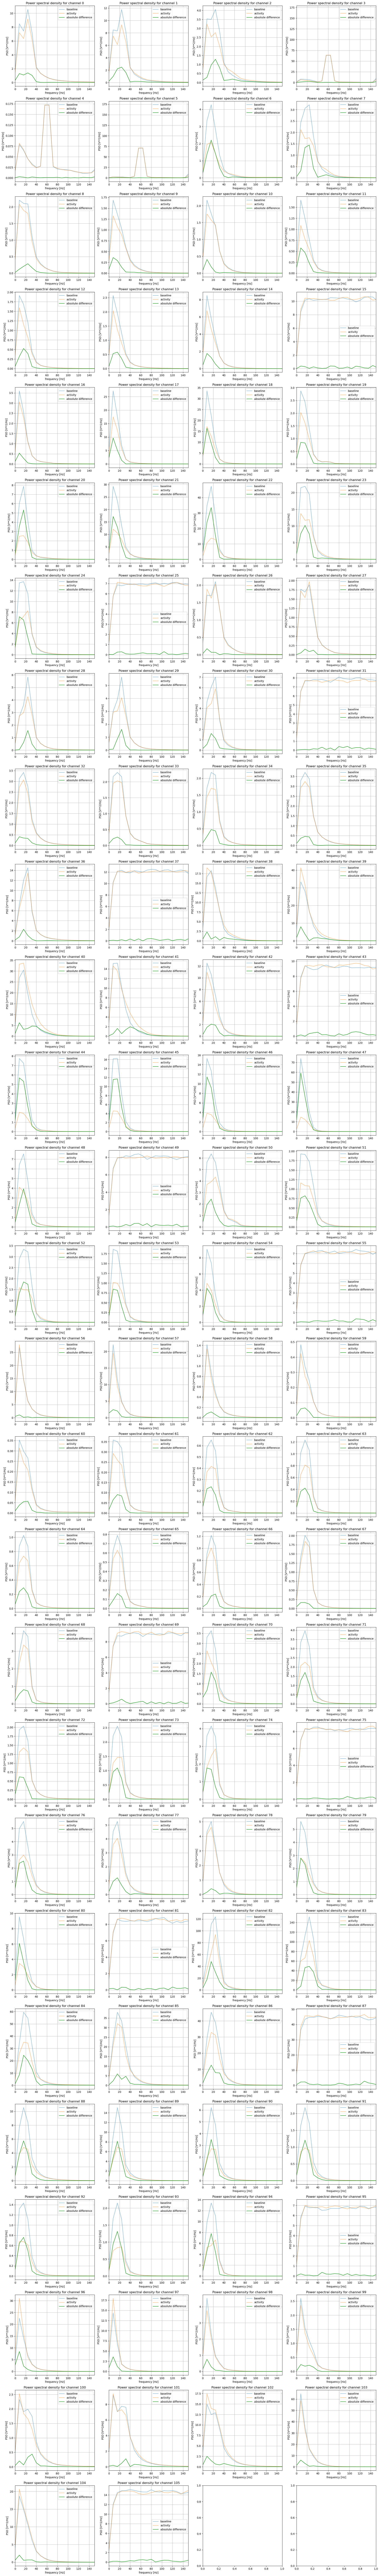

[TtestResult(statistic=2.2352930870278525, pvalue=0.027131361993469133, df=128), TtestResult(statistic=1.7613737045420654, pvalue=0.08056291034104555, df=128), TtestResult(statistic=1.4945611595100452, pvalue=0.1374902319797743, df=128), TtestResult(statistic=0.11424759967861739, pvalue=0.9092205319990814, df=128), TtestResult(statistic=-0.5806272481393401, pvalue=0.5625125569060787, df=128), TtestResult(statistic=-0.0314642622631222, pvalue=0.9749483013634632, df=128), TtestResult(statistic=1.8095654475767233, pvalue=0.07270967585648588, df=128), TtestResult(statistic=1.5516584886183813, pvalue=0.1232130113840789, df=128), TtestResult(statistic=2.1883664911498384, pvalue=0.030457853978299917, df=128), TtestResult(statistic=2.0421793945026976, pvalue=0.04318772732241953, df=128), TtestResult(statistic=1.5613858096508397, pvalue=0.12090181488205023, df=128), TtestResult(statistic=1.8804775803450873, pvalue=0.06231542615220302, df=128), TtestResult(statistic=1.8768114958169961, pvalue=0.

In [ ]:
fs = 2048
num_cols = 4
fig_width = 20

nb_channels = d[0].shape[0]
num_rows = int(np.ceil(nb_channels / num_cols))
fig_height = fig_width * num_rows / num_cols
_, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), sharey=False)
axs = axs.flatten()

ttests = []
for channel_id in tqdm(range(nb_channels)):
    baselines, activities = get_baselines_and_activities(session, channel_id)
    baselines_psds = []
    activities_psds = []
    for i in range(len(baselines)):
        baselines_psds.append(welch(baselines[i], fs=fs))
        activities_psds.append(welch(activities[i], fs=fs))
    mean_baseline_psd = np.array(baselines_psds).mean(axis=0)
    mean_activity_psd = np.array(activities_psds).mean(axis=0)
    ttests.append(ttest_rel(mean_baseline_psd[1], mean_activity_psd[1]))
    axs[channel_id].plot(mean_baseline_psd[0], mean_baseline_psd[1], label='baseline', alpha=0.5)
    axs[channel_id].plot(mean_activity_psd[0], mean_activity_psd[1], label='activity', alpha=0.5)
    axs[channel_id].plot(mean_activity_psd[0], abs(mean_baseline_psd[1] - mean_activity_psd[1]), label='absolute difference')
    axs[channel_id].set_title(f'Power spectral density for channel {channel_id}')
    axs[channel_id].set_xlabel('frequency [Hz]')
    axs[channel_id].set_ylabel('PSD [V**2/Hz]')
    axs[channel_id].set_xlim(0, 150)
    axs[channel_id].legend()
    axs[channel_id].grid()

plt.tight_layout()
plt.show()

In [10]:
p_value = 0.05
nb_rel_channels = 0
for i, test in enumerate(ttests):
    if test.pvalue <= p_value:
        nb_rel_channels +=1
        print(f'Channel {i} has a significant difference between baseline and activity (p-value: {test.pvalue})')

print(f'We can reduce from {nb_channels} channels to {nb_rel_channels} channels by removing channels with a significant difference between baseline and activity')

Channel 0 has a significant difference between baseline and activity (p-value: 0.027131361993469133)
Channel 8 has a significant difference between baseline and activity (p-value: 0.030457853978299917)
Channel 9 has a significant difference between baseline and activity (p-value: 0.04318772732241953)
Channel 15 has a significant difference between baseline and activity (p-value: 0.0006954859117857712)
Channel 32 has a significant difference between baseline and activity (p-value: 0.030311543304552737)
Channel 33 has a significant difference between baseline and activity (p-value: 0.04462944462336637)
Channel 39 has a significant difference between baseline and activity (p-value: 0.024790933389156347)
Channel 40 has a significant difference between baseline and activity (p-value: 0.0034282281923975234)
Channel 43 has a significant difference between baseline and activity (p-value: 7.364346216472488e-06)
Channel 51 has a significant difference between baseline and activity (p-value: 0.04